In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('engineering_admissions_2014_2023.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Summary statistics
print(df.describe())

# Total admission count by year
total_admissions_by_year = df.groupby('Year')['Total_Admission_Count'].sum()
print(total_admissions_by_year)

# Total admission count by department
total_admissions_by_department = df.groupby('Department')['Total_Admission_Count'].sum().sort_values(ascending=False)
print(total_admissions_by_department)

# Total admission count by category
categories = ['SC', 'GEN-EWS', 'ST', 'PwD', 'OB', 'GEN']
total_admissions_by_category = df[categories].sum()
print(total_admissions_by_category)

# Total admission count by area
areas = ['Navsari', 'Bardoli', 'Maroli', 'Surat', 'Chikhli', 'Bilimora', 'Valsad', 'Dharampur', 'Vapi', 'Other_Area']
total_admissions_by_area = df[areas].sum()
print(total_admissions_by_area)

# Filter the data for Computer Engineering
computer_engg_df = df[df['Department'] == 'Computer Engineering']

# Group the data by year and sum up the total admission counts
total_admissions_computer_engg = computer_engg_df.groupby('Year')['Total_Admission_Count'].sum()

print(total_admissions_computer_engg)


   Year              Department  Total_Admission_Count  SC  GEN-EWS  ST  PwD  \
0  2014    Computer Engineering                     75  10        8   5    6   
1  2014       Civil Engineering                     80  12        7   6    8   
2  2014  Mechanical Engineering                     85  14        9   5    7   
3  2014  Electrical Engineering                     70   8        6   4    5   
4  2014    Chemical Engineering                     65   7        5   3    4   

   OB  GEN  Navsari  Bardoli  Maroli  Surat  Chikhli  Bilimora  Valsad  \
0  12   34       28        4       2      3        4         6       7   
1  15   32       35        3       4      5        5         7       8   
2  14   36       30        5       3      4        6         8       9   
3  10   30       24        3       2      3        4         5       6   
4  11   25       20        2       2      3        3         4       5   

   Dharampur  Vapi  Other_Area  
0          8     6           3  
1       

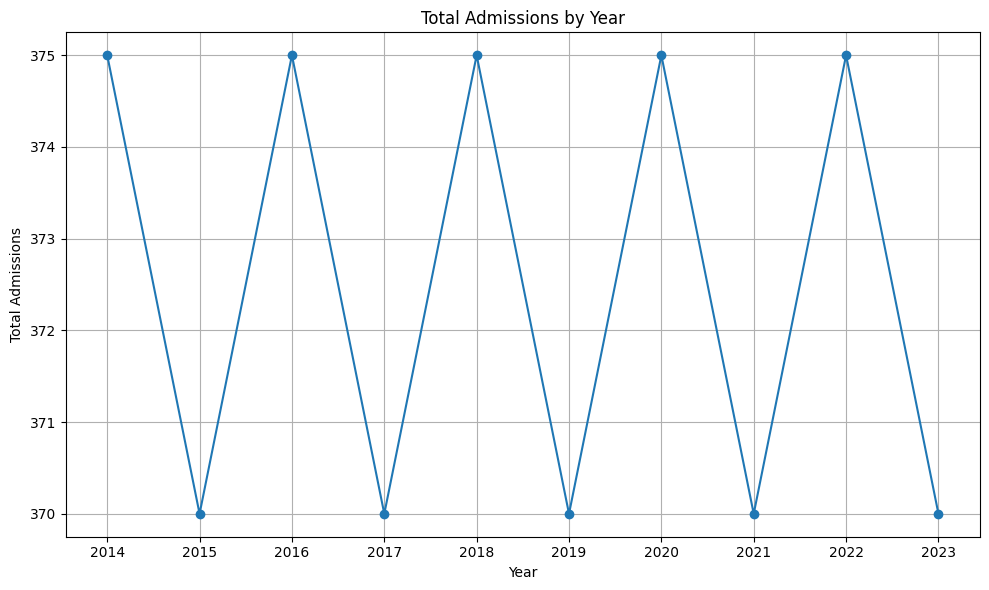

In [3]:
# Plotting total admissions by year
plt.figure(figsize=(10, 6))
plt.plot(total_admissions_by_year.index, total_admissions_by_year.values, marker='o', linestyle='-')
plt.title('Total Admissions by Year')
plt.xlabel('Year')
plt.ylabel('Total Admissions')
plt.grid(True)
plt.xticks(total_admissions_by_year.index)
plt.tight_layout()
plt.show()

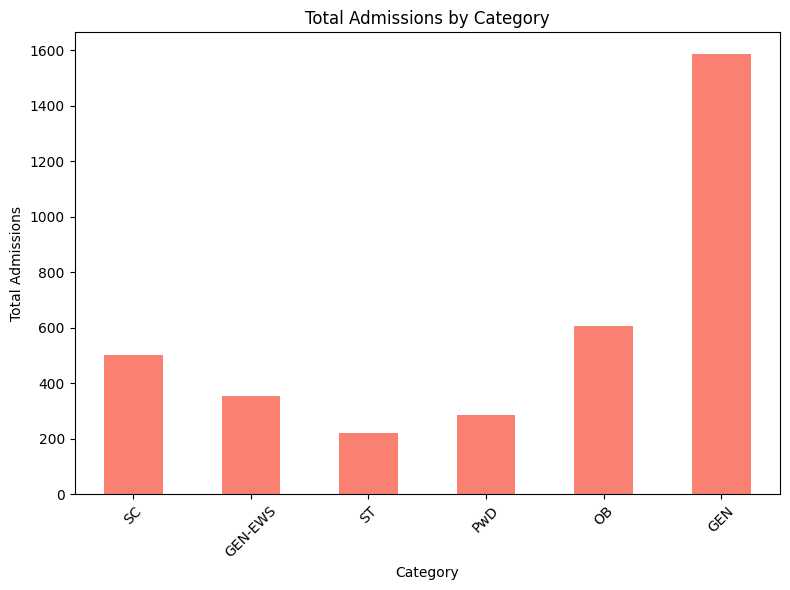

In [4]:
# Plotting total admissions by category
plt.figure(figsize=(8, 6))
total_admissions_by_category.plot(kind='bar', color='salmon')
plt.title('Total Admissions by Category')
plt.xlabel('Category')
plt.ylabel('Total Admissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

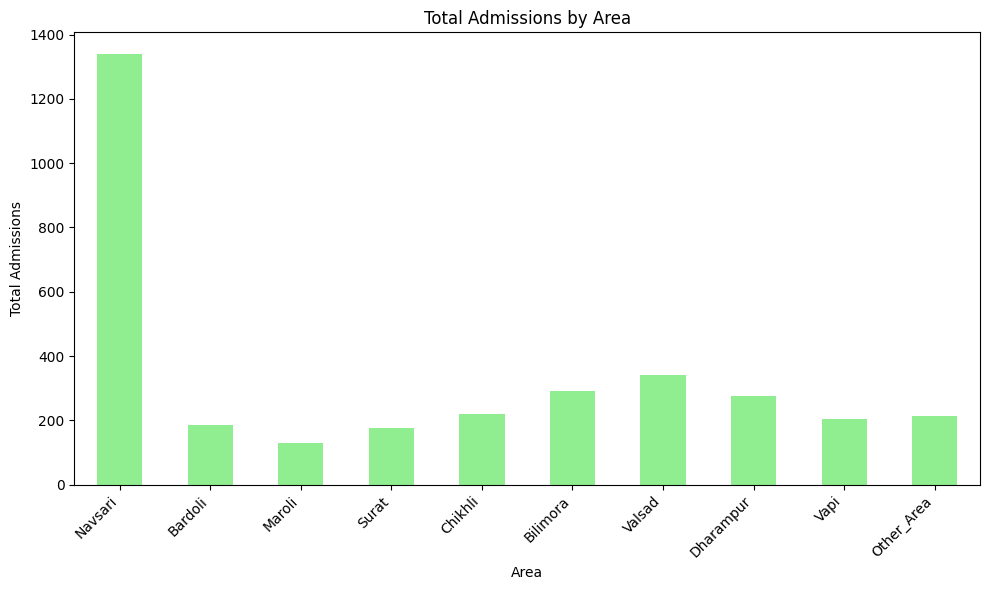

In [5]:
# Plotting total admissions by area
plt.figure(figsize=(10, 6))
total_admissions_by_area.plot(kind='bar', color='lightgreen')
plt.title('Total Admissions by Area')
plt.xlabel('Area')
plt.ylabel('Total Admissions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

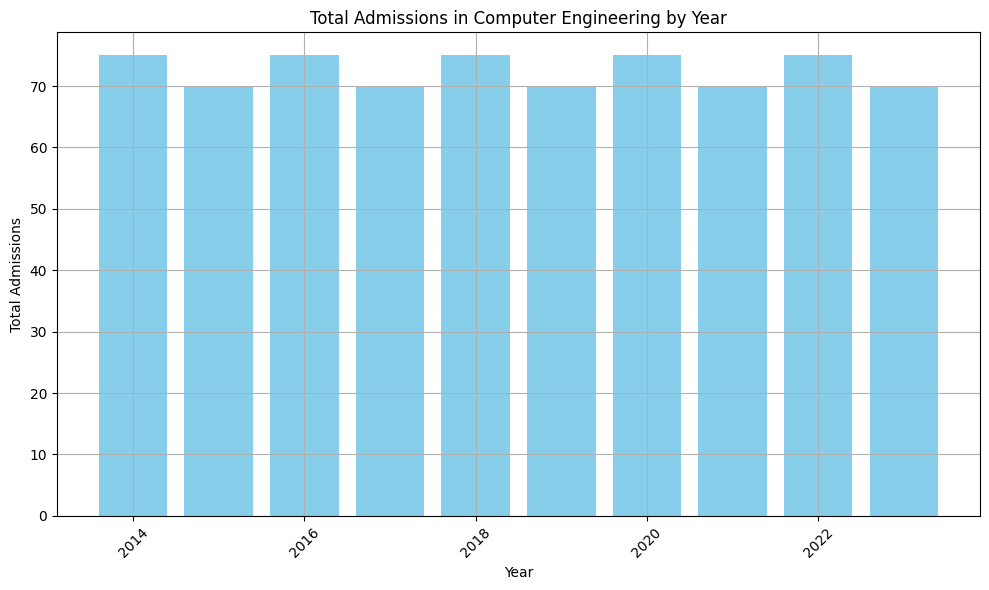

In [7]:
 #Filter the data for Computer Engineering
computer_engg_df = df[df['Department'] == 'Computer Engineering']

# Group the data by year and sum up the total admission counts
total_admissions_computer_engg = computer_engg_df.groupby('Year')['Total_Admission_Count'].sum()

# Plotting total admissions in Computer Engineering by year
plt.figure(figsize=(10, 6))
plt.bar(total_admissions_computer_engg.index, total_admissions_computer_engg.values, color='skyblue')
plt.title('Total Admissions in Computer Engineering by Year')
plt.xlabel('Year')
plt.ylabel('Total Admissions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

# Load the data from the CSV file
df = pd.read_csv('engineering_admissions_2014_2023.csv')

# List of departments
departments = df['Department'].unique()

# Train a single SVM model for all target variables
trained_models = {}
for department in departments:
    # Filter data for the department
    department_df = df[df['Department'] == department]
    
    # Separate features (input variables) and target variables
    X = department_df[['Year']]
    y = department_df.drop(columns=['Year', 'Department'])
    
    # Train a single SVM model for all target variables
    svr_model = SVR(kernel='linear')
    multioutput_svr_model = MultiOutputRegressor(svr_model)
    multioutput_svr_model.fit(X, y)
    
    # Store the trained model for the department
    trained_models[department] = multioutput_svr_model

# Function to make predictions for a future year
def make_predictions(year):
    predictions = {}
    for department, model in trained_models.items():
        prediction = model.predict([[year]])
        predictions[department] = {column: prediction[0][idx] for idx, column in enumerate(y.columns)}
    return predictions

# Example: Make predictions for the year 2024
future_year = 2024
predictions_2024 = make_predictions(future_year)
print(f"Predictions for the year {future_year}:\n{predictions_2024}")


Predictions for the year 2024:
{'Computer Engineering': {'Total_Admission_Count': 69.56666666659294, 'SC': 9.011111111508626, 'GEN-EWS': 7.011111111508626, 'ST': 4.011111111508626, 'PwD': 5.011111111508626, 'OB': 11.011111111508626, 'GEN': 34.0, 'Navsari': 24.78888888876827, 'Bardoli': 4.988888888450674, 'Maroli': 2.0, 'Surat': 3.0, 'Chikhli': 4.0, 'Bilimora': 5.011111111508626, 'Valsad': 6.011111111508626, 'Dharampur': 3.6777777783645433, 'Vapi': 2.7888888887682697, 'Other_Area': 3.0}, 'Civil Engineering': {'Total_Admission_Count': 74.56666666659294, 'SC': 9.899999999865031, 'GEN-EWS': 7.988888888450674, 'ST': 5.011111111508626, 'PwD': 5.899999999865031, 'OB': 11.78888888876827, 'GEN': 32.0, 'Navsari': 29.566666666592937, 'Bardoli': 3.9888888885844835, 'Maroli': 3.011111111510189, 'Surat': 4.011111111508626, 'Chikhli': 5.0, 'Bilimora': 6.011111111508626, 'Valsad': 7.011111111508626, 'Dharampur': 5.011111111508626, 'Vapi': 4.0, 'Other_Area': 3.899999999865031}, 'Mechanical Engineering'

C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from joblib import dump

# Load the data from the CSV file
df = pd.read_csv('engineering_admissions_2014_2023.csv')

# List of departments
departments = df['Department'].unique()

# Train a single SVM model for all target variables
trained_models = {}
for department in departments:
    # Filter data for the department
    department_df = df[df['Department'] == department]
    
    # Separate features (input variables) and target variables
    X = department_df[['Year']]
    y = department_df.drop(columns=['Year', 'Department'])
    
    # Train a single SVM model for all target variables
    svr_model = SVR(kernel='linear')
    multioutput_svr_model = MultiOutputRegressor(svr_model)
    multioutput_svr_model.fit(X, y)
    
    # Store the trained model for the department
    trained_models[department] = multioutput_svr_model

# Function to save the trained models
def save_models(trained_models):
    for department, model in trained_models.items():
        filename = f"{department}_svm_model.joblib"
        dump(model, filename)
        print(f"Saved model for {department} as {filename}")

# Save the trained models
save_models(trained_models)


Saved model for Computer Engineering as Computer Engineering_svm_model.joblib
Saved model for Civil Engineering as Civil Engineering_svm_model.joblib
Saved model for Mechanical Engineering as Mechanical Engineering_svm_model.joblib
Saved model for Electrical Engineering as Electrical Engineering_svm_model.joblib
Saved model for Chemical Engineering as Chemical Engineering_svm_model.joblib


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from joblib import dump

# Load the data from the CSV file
df = pd.read_csv('engineering_admissions_2014_2023.csv')

# List of departments
departments = df['Department'].unique()

# Train a single SVM model for all target variables
trained_models = {}
for department in departments:
    # Filter data for the department
    department_df = df[df['Department'] == department]
    
    # Separate features (input variables) and target variables
    X = department_df[['Year']]
    y = department_df.drop(columns=['Year', 'Department'])
    
    # Train a single SVM model for all target variables
    svr_model = SVR(kernel='linear')
    multioutput_svr_model = MultiOutputRegressor(svr_model)
    multioutput_svr_model.fit(X, y)
    
    # Store the trained model for the department
    trained_models[department] = multioutput_svr_model

# Function to make predictions for a future year
def make_predictions(year):
    predictions = {}
    for department, model in trained_models.items():
        prediction = model.predict([[year]])
        predictions[department] = {column: prediction[0][idx] for idx, column in enumerate(y.columns)}
    return predictions

# Example: Make predictions for the year 2024
future_year = 2024
predictions_2024 = make_predictions(future_year)
print(f"Predictions for the year {future_year}:\n{predictions_2024}")

# Function to save the trained models
def save_models(trained_models):
    for department, model in trained_models.items():
        filename = f"{department}_svm_model.joblib"
        dump(model, filename)
        print(f"Saved model for {department} as {filename}")

# Save the trained models
save_models(trained_models)


Predictions for the year 2024:
{'Computer Engineering': {'Total_Admission_Count': 69.56666666659294, 'SC': 9.011111111508626, 'GEN-EWS': 7.011111111508626, 'ST': 4.011111111508626, 'PwD': 5.011111111508626, 'OB': 11.011111111508626, 'GEN': 34.0, 'Navsari': 24.78888888876827, 'Bardoli': 4.988888888450674, 'Maroli': 2.0, 'Surat': 3.0, 'Chikhli': 4.0, 'Bilimora': 5.011111111508626, 'Valsad': 6.011111111508626, 'Dharampur': 3.6777777783645433, 'Vapi': 2.7888888887682697, 'Other_Area': 3.0}, 'Civil Engineering': {'Total_Admission_Count': 74.56666666659294, 'SC': 9.899999999865031, 'GEN-EWS': 7.988888888450674, 'ST': 5.011111111508626, 'PwD': 5.899999999865031, 'OB': 11.78888888876827, 'GEN': 32.0, 'Navsari': 29.566666666592937, 'Bardoli': 3.9888888885844835, 'Maroli': 3.011111111510189, 'Surat': 4.011111111508626, 'Chikhli': 5.0, 'Bilimora': 6.011111111508626, 'Valsad': 7.011111111508626, 'Dharampur': 5.011111111508626, 'Vapi': 4.0, 'Other_Area': 3.899999999865031}, 'Mechanical Engineering'

C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but

In [53]:
from joblib import load

# List of departments
departments = ['Computer Engineering', 'Civil Engineering', 'Mechanical Engineering', 'Electrical Engineering', 'Chemical Engineering']

# Function to load the trained models
def load_models(departments):
    trained_models = {}
    for department in departments:
        filename = f"{department}_svm_model.joblib"
        model = load(filename)
        trained_models[department] = model
    return trained_models

# Load the trained models
trained_models = load_models(departments)


In [58]:
# Function to make predictions for the future year using loaded models
def make_predictions_future_year(trained_models, future_year):
    predictions = {}
    for department, model in trained_models.items():
        prediction = model.predict([[future_year]])
        predictions[department] = {column: prediction[0][idx] for idx, column in enumerate(y.columns)}
    return predictions

# Example: Predict future year values for the year 2024
future_year = 2024
predictions_future_year = make_predictions_future_year(trained_models, future_year)

# Display the predictions for the future year
print(f"Predictions for the year {future_year}:")
for department, values in predictions_future_year.items():
    print(f"\nDepartment: {department}")
    for column, prediction in values.items():
        print(f"{column}: {prediction}")


Predictions for the year 2024:

Department: Computer Engineering
Total_Admission_Count: 69.56666666659294
SC: 9.011111111508626
GEN-EWS: 7.011111111508626
ST: 4.011111111508626
PwD: 5.011111111508626
OB: 11.011111111508626
GEN: 34.0
Navsari: 24.78888888876827
Bardoli: 4.988888888450674
Maroli: 2.0
Surat: 3.0
Chikhli: 4.0
Bilimora: 5.011111111508626
Valsad: 6.011111111508626
Dharampur: 3.6777777783645433
Vapi: 2.7888888887682697
Other_Area: 3.0

Department: Civil Engineering
Total_Admission_Count: 74.56666666659294
SC: 9.899999999865031
GEN-EWS: 7.988888888450674
ST: 5.011111111508626
PwD: 5.899999999865031
OB: 11.78888888876827
GEN: 32.0
Navsari: 29.566666666592937
Bardoli: 3.9888888885844835
Maroli: 3.011111111510189
Surat: 4.011111111508626
Chikhli: 5.0
Bilimora: 6.011111111508626
Valsad: 7.011111111508626
Dharampur: 5.011111111508626
Vapi: 4.0
Other_Area: 3.899999999865031

Department: Mechanical Engineering
Total_Admission_Count: 85.0
SC: 14.0
GEN-EWS: 9.0
ST: 5.0
PwD: 7.0
OB: 14.0

C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from joblib import load

# Load the trained SVM models
def load_models(departments):
    trained_models = {}
    for department in departments:
        filename = f"{department}_svm_model.joblib"
        model = load(filename)
        trained_models[department] = model
    return trained_models

# List of departments
departments = ['Computer Engineering', 'Civil Engineering', 'Mechanical Engineering', 'Electrical Engineering', 'Chemical Engineering']
# Load the trained models
trained_models = load_models(departments)

# Function to calculate MSE, RMSE, and R2 score
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

# Load the test data (assuming it has the same format as the training data)
test_df = pd.read_csv('engineering_admissions_2014_2023.csv')

# Evaluate the models on test data
mse_scores = {}
rmse_scores = {}
r2_scores = {}
for department, model in trained_models.items():
    # Filter test data for the department
    department_test_df = test_df[test_df['Department'] == department]
    
    # Separate features (input variables) and target variables
    X_test = department_test_df[['Year']]
    y_test = department_test_df.drop(columns=['Year', 'Department'])
    
    # Make predictions using the trained model
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse, rmse, r2 = calculate_metrics(y_test, y_pred)
    mse_scores[department] = mse
    rmse_scores[department] = rmse
    r2_scores[department] = r2

# Display the accuracy metrics
for department in departments:
    print(f"Department: {department}")
    print(f"MSE: {mse_scores[department]}")
    print(f"RMSE: {rmse_scores[department]}")
    print(f"R2 Score: {r2_scores[department]}")
    print()


Department: Computer Engineering
MSE: 1.1305446622693354
RMSE: 1.0632707379916628
R2 Score: 0.21897702739658112

Department: Civil Engineering
MSE: 1.3332026143548887
RMSE: 1.1546439340138104
R2 Score: 0.08673764227756028

Department: Mechanical Engineering
MSE: 0.0
RMSE: 0.0
R2 Score: 1.0

Department: Electrical Engineering
MSE: 0.741154684073866
RMSE: 0.8609034115821972
R2 Score: 0.4154470104589092

Department: Chemical Engineering
MSE: 0.0
RMSE: 0.0
R2 Score: 1.0

